# Text classification using LSTMS with tensorflow 2.0

Original notebook created by David Llorente @narrative.

## Descargamos el dataset

In [45]:
!wget https://raw.githubusercontent.com/susanli2016/PyCon-Canada-2019-NLP-Tutorial/master/bbc-text.csv

zsh:1: command not found: wget


## We import the required bookstores

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlosillanaldariz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

2.18.0


## We visualize the dataset

In [48]:
df = pd.read_csv('bbc-text.csv')

In [49]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [51]:
df.category.value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

## We create the dataset

In [52]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace('  ', ' ')
        articles.append(article)
print(len(labels))
print(list(set(labels)))
print(len(articles))

2225
['tech', 'politics', 'business', 'sport', 'entertainment']
2225


## We define some network parameters

In [53]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

## We divide the dataset

In [54]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


## We create the tokenizer

In [55]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

In [56]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

[2432, 1, 225, 4996, 22, 641, 587, 225, 4996, 1, 1, 1663, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2308, 1, 1144, 1694, 1, 1721, 4997, 1, 1, 1, 1, 1, 4739, 1, 1, 122, 4516, 1, 2, 2875, 1506, 352, 4740, 1, 52, 341, 1, 352, 2173, 3962, 41, 22, 3795, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4741, 1, 365, 22, 1, 787, 2368, 1, 4304, 138, 10, 1, 3665, 682, 3531, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1694, 1021, 1, 4998, 808, 1864, 117, 1, 1, 1, 2975, 22, 1, 99, 278, 1, 1608, 4999, 542, 492, 1, 1445, 4742, 779, 1321, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1507, 22, 479, 1, 1, 1666, 1, 797, 1, 3067, 1, 1365, 6, 1, 2432, 564, 22, 2972, 4736, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4305, 247]


In [57]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

425
200
192
200
186
200


In [58]:
print(train_padded[10])

[2432    1  225 4996   22  641  587  225 4996    1    1 1663    1    1
 2432   22  564    1    1  140  278    1  140  278  796  823  662 2308
    1 1144 1694    1 1721 4997    1    1    1    1    1 4739    1    1
  122 4516    1    2 2875 1506  352 4740    1   52  341    1  352 2173
 3962   41   22 3795    1    1    1    1  542    1    1    1  835  631
 2367  347 4741    1  365   22    1  787 2368    1 4304  138   10    1
 3665  682 3531    1   22    1  414  823  662    1   90   13  633    1
  225 4996    1  599    1 1694 1021    1 4998  808 1864  117    1    1
    1 2975   22    1   99  278    1 1608 4999  542  492    1 1445 4742
  779 1321    1 1861   10   33  641  319    1   62  478  564  301 1507
   22  479    1    1 1666    1  797    1 3067    1 1365    6    1 2432
  564   22 2972 4736    1    1    1    1    1  850   39 1825  675  297
   26  979    1  882   22  361   22   13  301 1507 1343  374   20   63
  883 1096 4305  247    0    0    0    0    0    0    0    0    0    0
    0 

In [59]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


## We encode the labels using the tokenizer

In [60]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [61]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

## We build our neuronal network

In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## We train our model

In [64]:
num_epochs = 3
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/3
56/56 - 5s - 87ms/step - accuracy: 0.3534 - loss: 1.5532 - val_accuracy: 0.5888 - val_loss: 1.1244
Epoch 2/3
56/56 - 4s - 63ms/step - accuracy: 0.7933 - loss: 0.7126 - val_accuracy: 0.7910 - val_loss: 0.7433
Epoch 3/3
56/56 - 5s - 89ms/step - accuracy: 0.8674 - loss: 0.4261 - val_accuracy: 0.8966 - val_loss: 0.3557


## We visualize the results

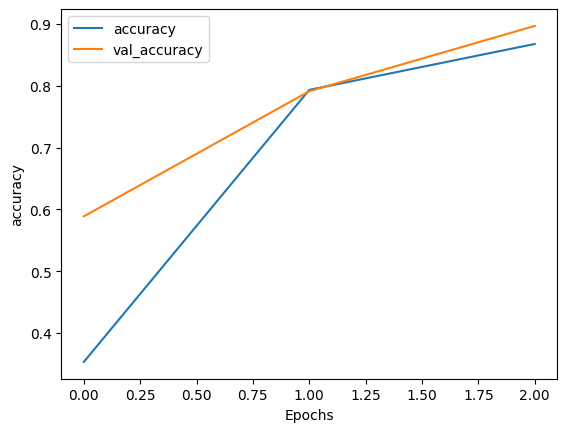

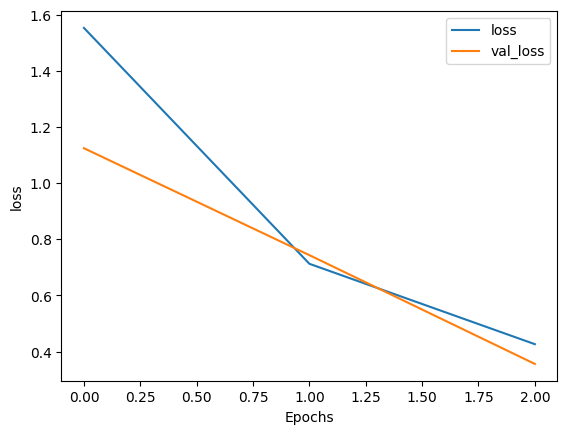

In [65]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Let's try our model

In [66]:
import pprint
txt = ["Stock market news live updates: S&P 500 rises to record close, Dow up 272 points ahead of July jobs report."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
print('Predicción\n')
pprint.pprint(pred)
print()
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(txt[0],'==>', labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Predicción

array([[0.00157999, 0.6544544 , 0.00096546, 0.32172626, 0.00921852,
        0.0120553 ]], dtype=float32)

Stock market news live updates: S&P 500 rises to record close, Dow up 272 points ahead of July jobs report. ==> bussiness
